In [19]:
from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/Colab Notebooks/DM/csv/df_final (1).csv"
file_path1 = "/content/drive/MyDrive/Colab Notebooks/DM/csv/df_final_unscale.csv"



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import os

directory_path = '/content/drive/MyDrive/Colab Notebooks/DM/csv'

if os.path.exists(directory_path):
    files = os.listdir(directory_path)
    print(f"Files in {directory_path}:")
    for f in files:
        print(f)
else:
    print(f"Directory not found: {directory_path}")

Files in /content/drive/MyDrive/Colab Notebooks/DM/csv:
en.openfoodfacts.org.products.csv.gz
openfoodfacts_columns_full.md
df_final (1).csv
openfoodfacts_fr_us_final (1).csv
df_final_unscale.csv


In [21]:
import pandas as pd

df = pd.read_csv(file_path)


In [22]:
df_raw = pd.read_csv(file_path1)

In [23]:
df = df.drop('categories_en', axis=1)

In [24]:
df

,code,countries_en,additives_n,nutriscore_score,nutriscore_grade,nova_group,unique_scans_n,completeness,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,general_category
0,3307484001255,France,5.0,15.0,d,4.0,1,0.8750,0.925729,0.570051,0.047644,0.685600,-0.090074,1.289807,0.376578,snack
1,3421557600098,France,0.0,32.0,e,3.0,0,0.7875,1.759243,2.080632,2.355321,0.744266,1.533194,0.625203,-0.323551,snack
2,3546588101373,France,0.0,13.0,d,3.0,0,0.4875,1.799937,2.232534,-0.402634,0.689051,-0.730307,1.289807,-0.287337,snack
3,3770009551458,France,4.0,18.0,d,4.0,0,0.7000,0.059941,-1.117749,-0.866984,1.272265,2.380117,-0.903387,-0.782256,snack
4,3597240060446,France,0.0,3.0,c,3.0,1,0.9875,-0.918105,-0.451068,-0.093068,-0.867337,-0.594194,-0.903387,-0.178697,dairy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228420,41196453850,United States,2.0,4.0,c,4.0,1,0.6000,-1.299781,-0.966691,-0.810699,-0.765533,-0.725266,-0.637545,-0.784670,breakfast and starch
228421,77890387672,United States,4.0,24.0,e,4.0,0,0.5000,1.171293,0.464564,0.231977,1.401676,0.987736,-0.903387,-0.317515,snack
228422,77232171365,United States,9.0,32.0,e,4.0,0,0.5000,1.160067,0.570051,1.947256,1.444814,1.271052,-0.903387,-0.266816,snack
228423,13800192080,United States,1.0,2.0,b,4.0,0,0.4000,-0.923718,-0.976818,-0.833213,-0.351762,-0.468164,0.027059,-0.234224,frozen food


In [25]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import joblib
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

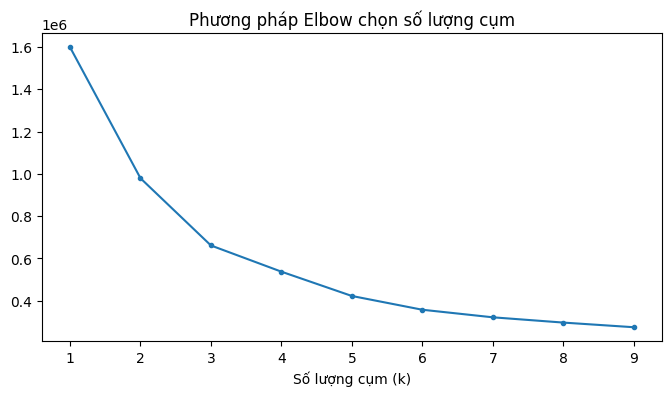

In [26]:


# Định nghĩa các nhóm đặc trưng cho từng ý tưởng
features_nutrition = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g']
# features_processing = ['additives_n', 'nova_group', 'nutriscore_score']

def plot_elbow(data, title):
    distortions = []
    K = range(1, 10)
    for k in K:
        kmeanModel = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeanModel.fit(data)
        distortions.append(kmeanModel.inertia_)

    plt.figure(figsize=(8, 4))
    plt.plot(K, distortions, '.-')
    plt.xlabel('Số lượng cụm (k)')
    plt.title(f'Phương pháp Elbow chọn số lượng cụm')
    plt.show()

plot_elbow(df[features_nutrition], "Hồ sơ Dinh dưỡng")

# plot_elbow(df[features_processing], "Mức độ chế biến & Phụ gia")

# # 3. Elbow cho Nhóm cụ thể (Ví dụ: Snack)
# df_snack = df[df['general_category'] == 'snack']
# plot_elbow(df_snack[features_nutrition], "Dinh dưỡng trong nhóm Snack")

In [27]:
### scaler
scaler = StandardScaler()
scaler.fit_transform(df_raw[features_nutrition])
joblib.dump(scaler, "nutri_scaler.pkl")

['nutri_scaler.pkl']

In [28]:
def analyze_clusters1(data_subset, original_df, n_clusters, title):
    # --- Bước 1: Gom cụm KMeans ---
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(data_subset)
    joblib.dump(kmeans, "kmeans_model.pkl")

    # Thêm cột cluster vào dataframe để phân tích
    temp_df = data_subset.copy()
    temp_df['Cluster'] = clusters

    # --- Bước 2: Vẽ Scatter Plot (Dùng PCA để giảm chiều) ---
    pca = PCA(n_components=2)
    pca_comps = pca.fit_transform(data_subset)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=pca_comps[:, 0], y=pca_comps[:, 1], hue=clusters, palette='viridis')
    plt.title(f'{title}')

    # --- Bước 3: Vẽ Heatmap (Đặc trưng của từng cụm) ---
    plt.subplot(1, 2, 2)
    cluster_features = temp_df.groupby('Cluster').mean()
    sns.heatmap(cluster_features, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Đặc trưng {title}')

    plt.tight_layout()
    plt.show()

    return temp_df

In [29]:
def analyze_clusters(data_subset, original_df, n_clusters, title):
    # --- Gom cụm KMeans ---
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(data_subset)
    joblib.dump(kmeans, "kmeans_model.pkl")

    silhouette_avg = silhouette_score(data_subset, clusters)
    print(f"Đối với n_clusters = {n_clusters}, Silhouette Score trung bình là: {silhouette_avg:.4f}")

    temp_df = data_subset.copy()
    temp_df['Cluster'] = clusters

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

    pca = PCA(n_components=2)
    pca_comps = pca.fit_transform(data_subset)
    sns.scatterplot(x=pca_comps[:, 0], y=pca_comps[:, 1], hue=clusters, palette='viridis', ax=ax1)
    ax1.set_title(f'PCA Scatter Plot: {title}')

    cluster_features = temp_df.groupby('Cluster').mean()
    sns.heatmap(cluster_features, annot=True, cmap='coolwarm', fmt=".2f", ax=ax2)
    ax2.set_title(f'Đặc trưng {title}')

    sample_silhouette_values = silhouette_samples(data_subset, clusters)
    y_lower = 10

    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax3.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax3.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax3.set_title("Silhouette Plot")
    ax3.set_xlabel("Hệ số Silhouette")
    ax3.set_ylabel("Cụm")

    ax3.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax3.set_yticks([])
    ax3.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.tight_layout()
    plt.show()

    return temp_df

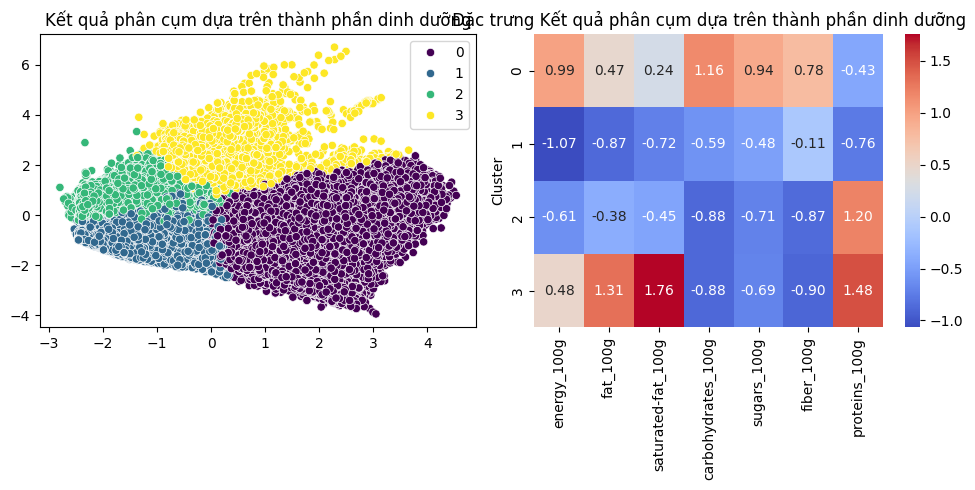

In [30]:
features_nutri = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g']
df_nutri = analyze_clusters1(df[features_nutri], df, n_clusters=4, title="Kết quả phân cụm dựa trên thành phần dinh dưỡng")

Đối với n_clusters = 4, Silhouette Score trung bình là: 0.4120


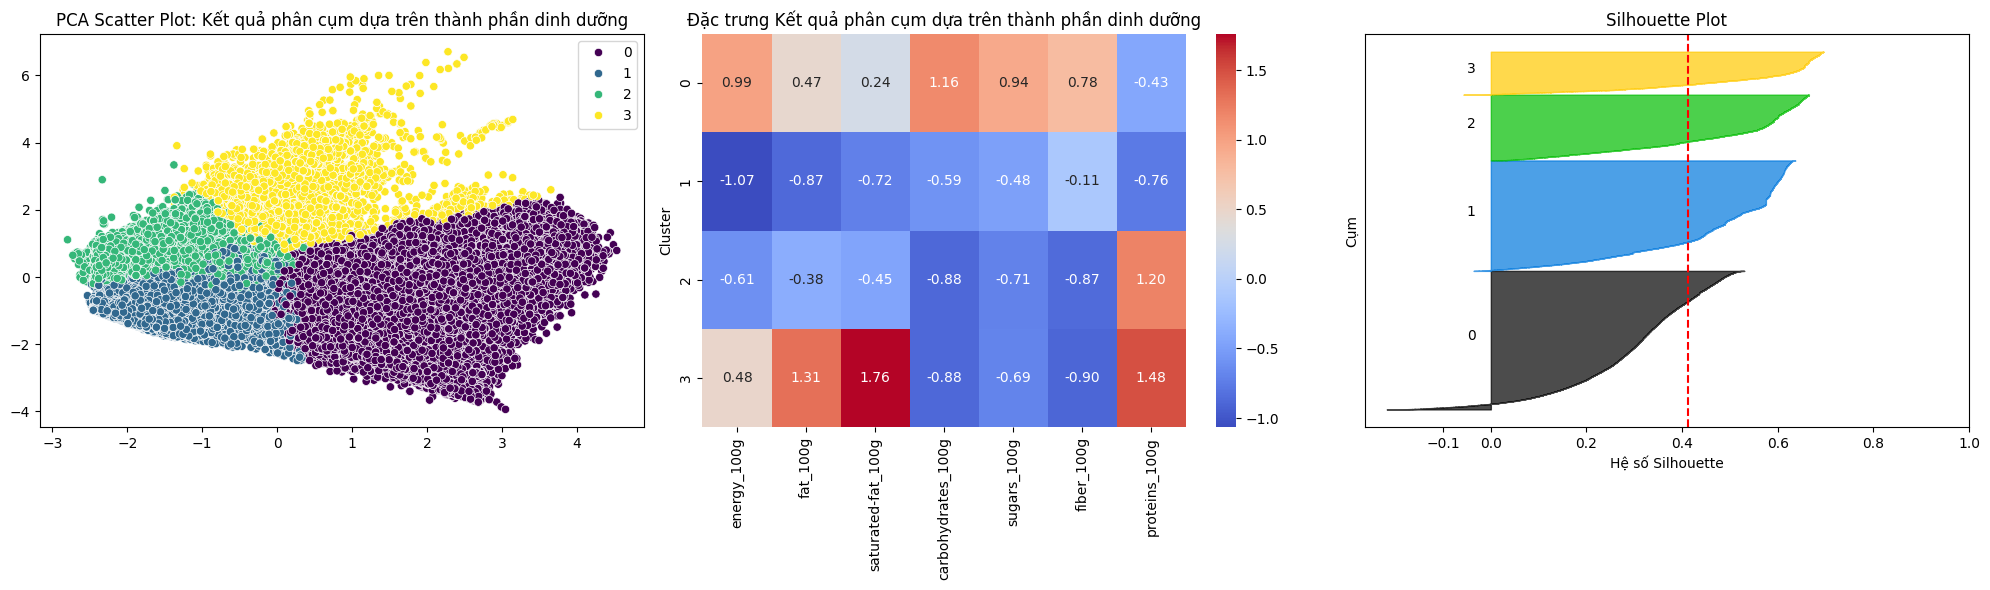

In [31]:
features_nutri = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g']
df_nutri = analyze_clusters(df[features_nutri], df, n_clusters=4, title="Kết quả phân cụm dựa trên thành phần dinh dưỡng")

Đối với n_clusters = 5, Silhouette Score trung bình là: 0.4042


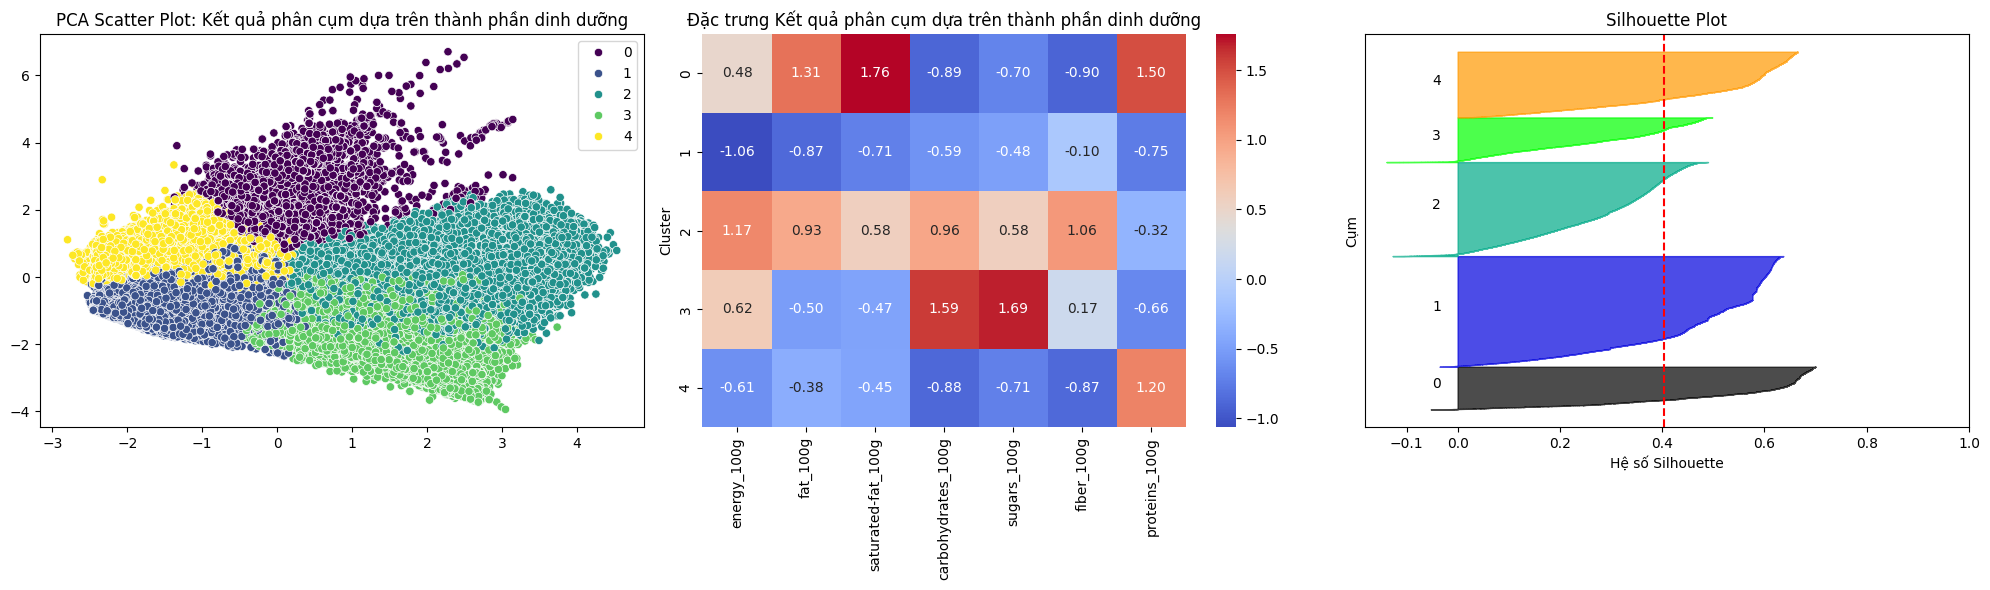

In [32]:
features_nutri = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g']
df_nutri = analyze_clusters(df[features_nutri], df, n_clusters=5, title="Kết quả phân cụm dựa trên thành phần dinh dưỡng")

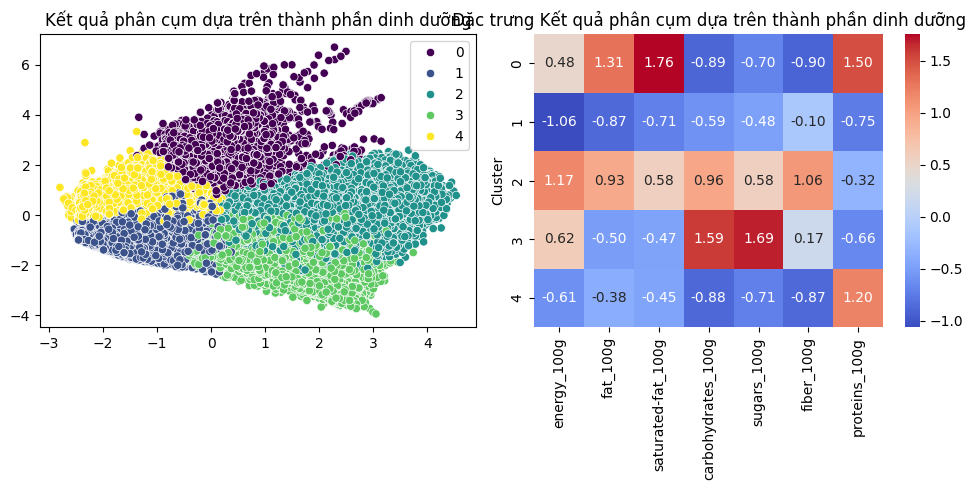

In [33]:
features_nutri = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g']
df_nutri = analyze_clusters1(df[features_nutri], df, n_clusters=5, title="Kết quả phân cụm dựa trên thành phần dinh dưỡng")

### Phân tích so sánh giữa số cụm là 4 và số cụm là 5
- Cả biểu đồ 4 cụm hay 5 cụm nhìn chung thì các cụm tách biệt nhau khá rõ, không bị lẫn lộn hòa trộn giữa các cột khá nhiều.
- Số trên heatmap thể hiện giá trị trung bình của điểm tâm của cụm đó (trung bình của từng chỉ số trong cụm)
- Có thể thấy với số cụm là 4 thì đặc trưng cho từng cụm hiện rõ hơn với khi số cụm là 5.


### So sánh số cụm phân được với biến general_category
Phân tích mối quan hệ giữa kết quả gom cụm dựa trên thành phần dinh dưỡng và nhãn phân loại general_category cho thấy sự khác biệt đáng kể giữa hai cách tiếp cận. Trong khi general_category phản ánh cách phân loại truyền thống theo loại thực phẩm, các cụm thu được từ mô hình gom cụm phản ánh các vai trò dinh dưỡng thực tế của sản phẩm. Kết quả cho thấy một nhóm thực phẩm tổng quát có thể phân bố vào nhiều cụm khác nhau, và ngược lại, một cụm có thể bao gồm nhiều nhóm thực phẩm. Điều này chứng tỏ phân loại truyền thống chưa phản ánh đầy đủ cấu trúc dinh dưỡng tiềm ẩn trong dữ liệu, đồng thời khẳng định giá trị của phương pháp gom cụm trong việc khai phá tri thức mới từ dữ liệu thực phẩm.”

In [34]:
loaded_scaler = joblib.load("nutri_scaler.pkl")
loaded_kmeans = joblib.load("kmeans_model.pkl")
new_product = [[1250, 15, 5, 20, 10, 2, 8]]
product = loaded_scaler.transform(new_product)
predicted_cluster = loaded_kmeans.predict(product)
print(f"Sản phẩm này thuộc nhóm: {predicted_cluster}")

Sản phẩm này thuộc nhóm: [1]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


### Đề xuất sản phẩm có chất dinh dưỡng tốt hơn

In [35]:
def recommend_healthier_swaps(product_code, df, top_n=10):
    from sklearn.metrics.pairwise import euclidean_distances
    target = df[df['code'] == product_code]
    if target.empty:
        return "Không tìm thấy sản phẩm!"

    target_info = target.iloc[0]
    target_grade = target_info['nutriscore_grade']
    target_category = target_info['general_category']
    target_features = target[features_nutri].values

    grade_order = {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5}
    target_rank = grade_order.get(target_grade.lower(), 6)


    healthier_candidates = df[
        (df['general_category'] == target_category) &
        (df['nutriscore_grade'].map(lambda x: grade_order.get(x.lower(), 6)) < target_rank)
    ].copy()

    if healthier_candidates.empty:
        return f"Sản phẩm có thành phần dinh dưỡng tốt trong nhóm {target_category}."

    candidate_features = healthier_candidates[features_nutri].values
    distances = euclidean_distances(target_features, candidate_features)[0]
    healthier_candidates['similarity_distance'] = distances

    recommendations = healthier_candidates.sort_values(by=['nutriscore_grade','similarity_distance'],ascending=[True,True]).head(top_n)

    return recommendations[['code', 'general_category', 'nutriscore_grade', 'nova_group', 'similarity_distance']]

In [36]:
from sklearn.metrics.pairwise import euclidean_distances

sample_bad_product = df[df['nutriscore_grade'].isin(['d', 'e'])].iloc[0]['code']

print(f"Sản phẩm bạn đang chọn có mã: {sample_bad_product}")
swaps = recommend_healthier_swaps(sample_bad_product, df)
print("Các sản phẩm có lựa chọn khác")
print(swaps)

Sản phẩm bạn đang chọn có mã: 3307484001255
Các sản phẩm có lựa chọn khác
                code general_category nutriscore_grade  nova_group  \
9392   3760324844243            snack                a         3.0   
17203  3390390005578            snack                a         3.0   
34602    87703080485            snack                a         4.0   
50952  3760034000403            snack                a         3.0   
57971  5032722311350            snack                a         3.0   
62643  3770001230047            snack                a         3.0   
81505  3590920717524            snack                a         3.0   
84643  2298668027943            snack                a         4.0   
90864  3760324844182            snack                a         1.0   
98240  2000000122813            snack                a         3.0   

       similarity_distance  
9392              1.075085  
17203             1.075085  
34602             1.075085  
50952             1.075085  
57971     